 # Yu Hao yh3252 N11861972 Week2 Assignment2

## Step 1-3 Perceptron and Adaline Code

In [ ]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)


In [ ]:
import numpy as np

class AdalineGD(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return X

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

# Linearly Separable

## Step 4-Two Features Input

       0    1    2    3               4
40   5.0  3.5  1.3  0.3     Iris-setosa
41   4.5  2.3  1.3  0.3     Iris-setosa
42   4.4  3.2  1.3  0.2     Iris-setosa
43   5.0  3.5  1.6  0.6     Iris-setosa
44   5.1  3.8  1.9  0.4     Iris-setosa
45   4.8  3.0  1.4  0.3     Iris-setosa
46   5.1  3.8  1.6  0.2     Iris-setosa
47   4.6  3.2  1.4  0.2     Iris-setosa
48   5.3  3.7  1.5  0.2     Iris-setosa
49   5.0  3.3  1.4  0.2     Iris-setosa
100  6.3  3.3  6.0  2.5  Iris-virginica
101  5.8  2.7  5.1  1.9  Iris-virginica
102  7.1  3.0  5.9  2.1  Iris-virginica
103  6.3  2.9  5.6  1.8  Iris-virginica
104  6.5  3.0  5.8  2.2  Iris-virginica
105  7.6  3.0  6.6  2.1  Iris-virginica
106  4.9  2.5  4.5  1.7  Iris-virginica
107  7.3  2.9  6.3  1.8  Iris-virginica
108  6.7  2.5  5.8  1.8  Iris-virginica
109  7.2  3.6  6.1  2.5  Iris-virginica


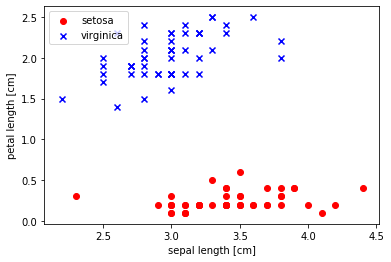

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('iris.data', header=None)
df1 = df[0:50]
df2 = df[100:150]
df = pd.concat([df1,df2])
print(df[40:60])

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [1, 3]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='virginica')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

## Step 4-Two Features Training of Perceptron and Adaline

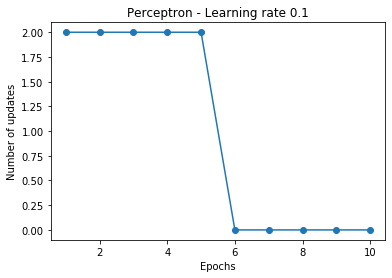

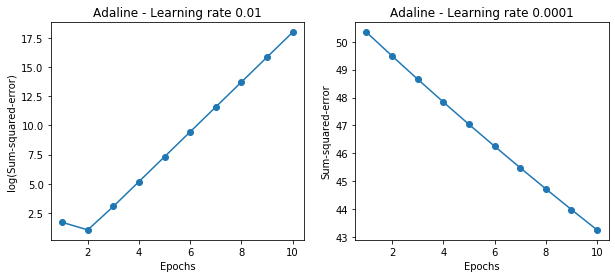

In [8]:
# -*- coding: utf-8 -*-
"""
Created on Sat Sep  7 17:59:04 2019

@author: Sumail
"""
import Perceptron 
import matplotlib.pyplot as plt
import numpy as np
import Inputdata
import AdalineGD

ppn = Perceptron.Perceptron(eta=0.1, n_iter=10)

ppn.fit(Inputdata.X, Inputdata.y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.title('Perceptron - Learning rate 0.1')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD.AdalineGD(n_iter=10, eta=0.01).fit(Inputdata.X, Inputdata.y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD.AdalineGD(n_iter=10, eta=0.0001).fit(Inputdata.X, Inputdata.y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

# plt.savefig('images/02_11.png', dpi=300)
plt.show()

## Step 5-Three Features Input

       0    1    2    3               4
40   5.0  3.5  1.3  0.3     Iris-setosa
41   4.5  2.3  1.3  0.3     Iris-setosa
42   4.4  3.2  1.3  0.2     Iris-setosa
43   5.0  3.5  1.6  0.6     Iris-setosa
44   5.1  3.8  1.9  0.4     Iris-setosa
45   4.8  3.0  1.4  0.3     Iris-setosa
46   5.1  3.8  1.6  0.2     Iris-setosa
47   4.6  3.2  1.4  0.2     Iris-setosa
48   5.3  3.7  1.5  0.2     Iris-setosa
49   5.0  3.3  1.4  0.2     Iris-setosa
100  6.3  3.3  6.0  2.5  Iris-virginica
101  5.8  2.7  5.1  1.9  Iris-virginica
102  7.1  3.0  5.9  2.1  Iris-virginica
103  6.3  2.9  5.6  1.8  Iris-virginica
104  6.5  3.0  5.8  2.2  Iris-virginica
105  7.6  3.0  6.6  2.1  Iris-virginica
106  4.9  2.5  4.5  1.7  Iris-virginica
107  7.3  2.9  6.3  1.8  Iris-virginica
108  6.7  2.5  5.8  1.8  Iris-virginica
109  7.2  3.6  6.1  2.5  Iris-virginica


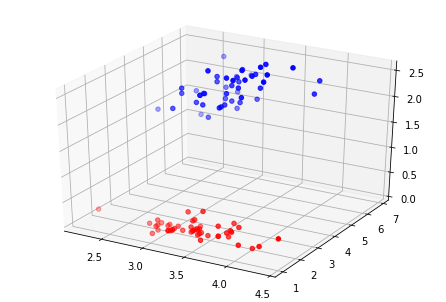

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

df = pd.read_csv('iris.data', header=None)
df1 = df[0:50]
df2 = df[100:150]
df = pd.concat([df1,df2])
print(df[40:60])

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [1,2,3]].values

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:50, 0], X[:50, 1], X[:50, 2],c = 'red')
ax.scatter(X[50:100, 0], X[50:100, 1], X[50:100, 2],c = 'blue')
'''
# plot data
plt.scatter(X[:50, 0], X[:50, 1], X[:50, 2],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], X[50:100, 2],
            color='blue', marker='x', label='virginica')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

#plt.savefig('images/02_06.png', dpi=300)'''
plt.show()

## Step 5-Three Features Training of Perceptron and Adaline

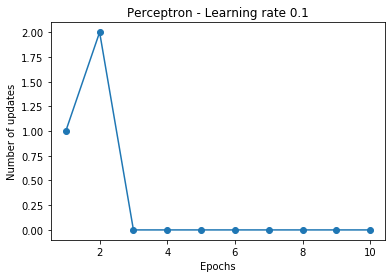

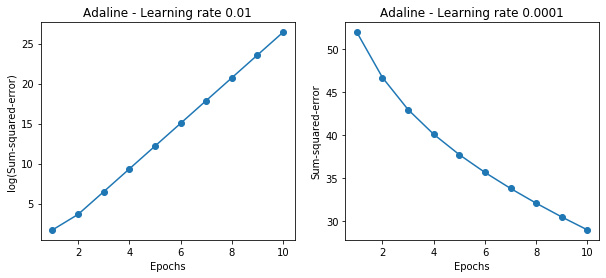

In [15]:
# -*- coding: utf-8 -*-
"""
Created on Sat Sep  7 17:59:04 2019

@author: Sumail
"""
import Perceptron 
import matplotlib.pyplot as plt
import numpy as np
import AdalineGD
import pandas as pd

df = pd.read_csv('iris.data', header=None)
df1 = df[0:50]
df2 = df[100:150]
df = pd.concat([df1,df2])
#print(df[40:60])

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [1,2,3]].values
ppn = Perceptron.Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.title('Perceptron - Learning rate 0.1')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD.AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD.AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

# plt.savefig('images/02_11.png', dpi=300)
plt.show()

## Step 6-Four Features Training Perceptron and Adaline

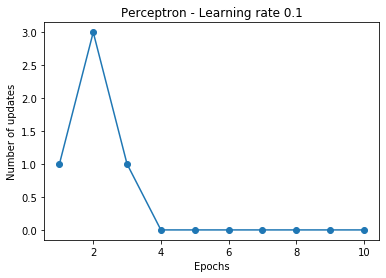

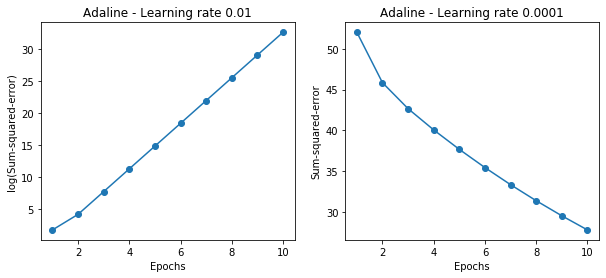

In [14]:
# -*- coding: utf-8 -*-
"""
Created on Sat Sep  7 17:59:04 2019

@author: Sumail
"""
import Perceptron 
import matplotlib.pyplot as plt
import numpy as np
import AdalineGD
import pandas as pd

df = pd.read_csv('iris.data', header=None)
df1 = df[0:50]
df2 = df[100:150]
df = pd.concat([df1,df2])
#print(df[40:60])

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0,1,2,3]].values
ppn = Perceptron.Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.title('Perceptron - Learning rate 0.1')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD.AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD.AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

# plt.savefig('images/02_11.png', dpi=300)
plt.show()

# NOT Linearly Separable

## Step 7-Two Features Input

       0    1    2    3                4
90   5.5  2.6  4.4  1.2  Iris-versicolor
91   6.1  3.0  4.6  1.4  Iris-versicolor
92   5.8  2.6  4.0  1.2  Iris-versicolor
93   5.0  2.3  3.3  1.0  Iris-versicolor
94   5.6  2.7  4.2  1.3  Iris-versicolor
95   5.7  3.0  4.2  1.2  Iris-versicolor
96   5.7  2.9  4.2  1.3  Iris-versicolor
97   6.2  2.9  4.3  1.3  Iris-versicolor
98   5.1  2.5  3.0  1.1  Iris-versicolor
99   5.7  2.8  4.1  1.3  Iris-versicolor
100  6.3  3.3  6.0  2.5   Iris-virginica
101  5.8  2.7  5.1  1.9   Iris-virginica
102  7.1  3.0  5.9  2.1   Iris-virginica
103  6.3  2.9  5.6  1.8   Iris-virginica
104  6.5  3.0  5.8  2.2   Iris-virginica
105  7.6  3.0  6.6  2.1   Iris-virginica
106  4.9  2.5  4.5  1.7   Iris-virginica
107  7.3  2.9  6.3  1.8   Iris-virginica
108  6.7  2.5  5.8  1.8   Iris-virginica
109  7.2  3.6  6.1  2.5   Iris-virginica


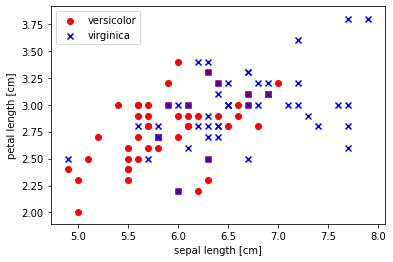

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

df = pd.read_csv('iris.data', header=None)
df1 = df[50:100]
df2 = df[100:150]
df = pd.concat([df1,df2])
print(df[40:60])

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 1]].values
'''
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:50, 0], X[:50, 1], X[:50, 2],c = 'red')
ax.scatter(X[50:100, 0], X[50:100, 1], X[50:100, 2],c = 'blue')
'''
# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='versicolor')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='virginica')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

#plt.savefig('images/02_06.png', dpi=300)
plt.show()

## Step 7-Two Features Training of Perceptron and Adaline

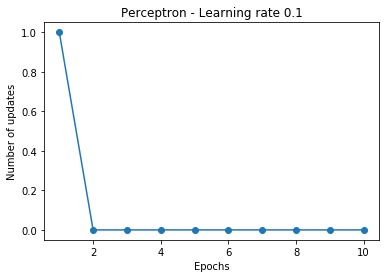

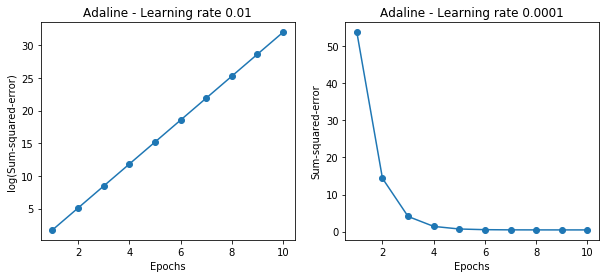

In [18]:
# -*- coding: utf-8 -*-
"""
Created on Sat Sep  7 17:59:04 2019

@author: Sumail
"""
import Perceptron 
import matplotlib.pyplot as plt
import numpy as np
import AdalineGD
import pandas as pd

df = pd.read_csv('iris.data', header=None)
df1 = df[50:100]
df2 = df[100:150]
df = pd.concat([df1,df2])
#print(df[40:60])

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0,1]].values
ppn = Perceptron.Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.title('Perceptron - Learning rate 0.1')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD.AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD.AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

# plt.savefig('images/02_11.png', dpi=300)
plt.show()

## Step 8-Three Features Input

       0    1    2    3                4
90   5.5  2.6  4.4  1.2  Iris-versicolor
91   6.1  3.0  4.6  1.4  Iris-versicolor
92   5.8  2.6  4.0  1.2  Iris-versicolor
93   5.0  2.3  3.3  1.0  Iris-versicolor
94   5.6  2.7  4.2  1.3  Iris-versicolor
95   5.7  3.0  4.2  1.2  Iris-versicolor
96   5.7  2.9  4.2  1.3  Iris-versicolor
97   6.2  2.9  4.3  1.3  Iris-versicolor
98   5.1  2.5  3.0  1.1  Iris-versicolor
99   5.7  2.8  4.1  1.3  Iris-versicolor
100  6.3  3.3  6.0  2.5   Iris-virginica
101  5.8  2.7  5.1  1.9   Iris-virginica
102  7.1  3.0  5.9  2.1   Iris-virginica
103  6.3  2.9  5.6  1.8   Iris-virginica
104  6.5  3.0  5.8  2.2   Iris-virginica
105  7.6  3.0  6.6  2.1   Iris-virginica
106  4.9  2.5  4.5  1.7   Iris-virginica
107  7.3  2.9  6.3  1.8   Iris-virginica
108  6.7  2.5  5.8  1.8   Iris-virginica
109  7.2  3.6  6.1  2.5   Iris-virginica


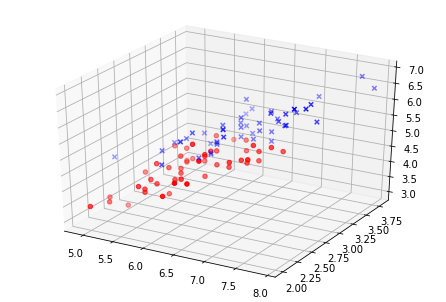

In [20]:
# -*- coding: utf-8 -*-
"""
Created on Sat Sep  7 17:49:07 2019

@author: Sumail
"""

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

df = pd.read_csv('iris.data', header=None)
df1 = df[50:100]
df2 = df[100:150]
df = pd.concat([df1,df2])
print(df[40:60])

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 1, 2]].values

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:50, 0], X[:50, 1], X[:50, 2],c = 'red', marker='o', label='versicolor')
ax.scatter(X[50:100, 0], X[50:100, 1], X[50:100, 2],c = 'blue', marker='x', label='virginica')
'''
# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='versicolor')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='virginica')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

#plt.savefig('images/02_06.png', dpi=300)'''
plt.show()

## Step 8-Three Features Training of Perceptron and Adaline

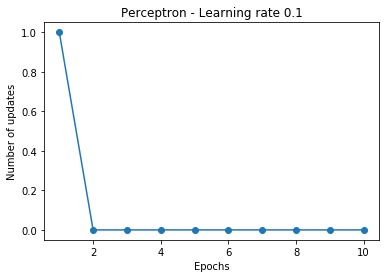

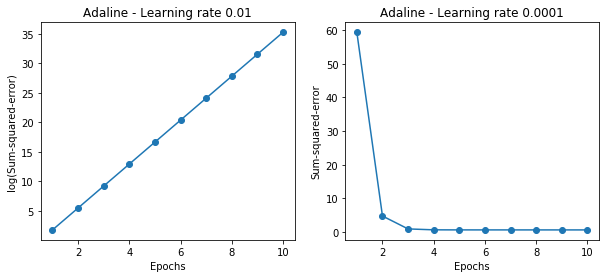

In [21]:
# -*- coding: utf-8 -*-
"""
Created on Sat Sep  7 17:59:04 2019

@author: Sumail
"""
import Perceptron 
import matplotlib.pyplot as plt
import numpy as np
import AdalineGD
import pandas as pd

df = pd.read_csv('iris.data', header=None)
df1 = df[50:100]
df2 = df[100:150]
df = pd.concat([df1,df2])
#print(df[40:60])

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 1, 2]].values
ppn = Perceptron.Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.title('Perceptron - Learning rate 0.1')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD.AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD.AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

# plt.savefig('images/02_11.png', dpi=300)
plt.show()

## Step 9-Four Features Training of Perceptron and Adaline

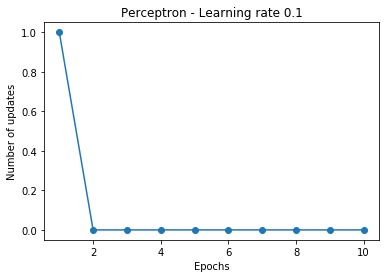

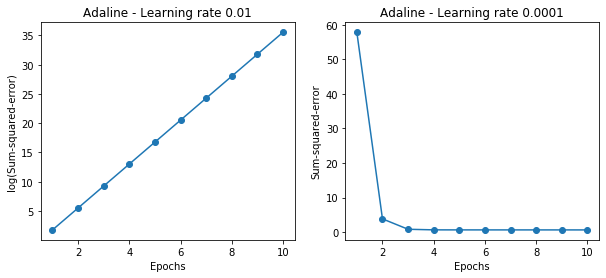

In [22]:
# -*- coding: utf-8 -*-
"""
Created on Sat Sep  7 17:59:04 2019

@author: Sumail
"""
import Perceptron 
import matplotlib.pyplot as plt
import numpy as np
import AdalineGD
import pandas as pd

df = pd.read_csv('iris.data', header=None)
df1 = df[50:100]
df2 = df[100:150]
df = pd.concat([df1,df2])
#print(df[40:60])

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 1, 2, 3]].values
ppn = Perceptron.Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.title('Perceptron - Learning rate 0.1')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD.AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD.AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

# plt.savefig('images/02_11.png', dpi=300)
plt.show()

# Step 10-Result

### Perception and Adaline are classifiers for binary classification. When the data for two species are linearly separable, They both have good performances. However, when it comes to the data for two species that are NOT linearly separable, the shortcoming of the Perceptron appears that it cannot deal with the linearly inseparable data. During the training process, Perceptron has not been updated at all, it keeps the initial state. Compared to the Perceptron, Adaline have good performance in dealing with both linearly separable data and linearly inseparable data.

### As for Adaline, learning rate plays an important role. The selection of appropriate learning rate will leads to a successful and valid training model, vice versa.